In [1]:
import pandas as pd
import numpy as np
import sklearn
import pandas as pd 
import numpy as np
import sklearn
import psycopg2 as psy
import os 
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib import *
import sys
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor

%matplotlib inline

os.getcwd()

'/Users/HudsonCavanagh/GA_dsi-projects/capstone'

Reading in the CSVs - Deaths are Drug-Related Deaths, 

In [2]:
# cdc_99_03 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/CDC_Wonder/Underlying Cause of Death, 1999-2003.csv')
# cdc_04_09 = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/Opioid/CDC_Wonder/Underlying Cause of Death 2004-2009.csv')



cdc_1999 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/cdc_1999.csv', delimiter='\t', encoding='utf-8')
cdc_2000 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/cdc_2000.csv', delimiter='\t', encoding='utf-8')
cdc_2001 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/cdc_2001.csv', delimiter='\t', encoding='utf-8')
cdc_2002 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/cdc_2002.csv', delimiter='\t', encoding='utf-8')
cdc_2003 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/cdc_2003.csv', delimiter='\t', encoding='utf-8')
cdc_2004 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/cdc_2004.csv', delimiter='\t', encoding='utf-8')
cdc_2005 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/cdc_2005.csv', delimiter='\t', encoding='utf-8')
cdc_2006 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/cdc_2006.csv', delimiter='\t', encoding='utf-8')
cdc_2007 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/cdc_2007.csv', delimiter='\t', encoding='utf-8')
cdc_2008 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/cdc_2008.csv', delimiter='\t', encoding='utf-8')
cdc_2009 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/cdc_2009.csv', delimiter='\t', encoding='utf-8')
cdc_2010 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/cdc_2010.csv', delimiter='\t', encoding='utf-8')
cdc_2011 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/cdc_2011.csv', delimiter='\t', encoding='utf-8')
cdc_2012 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/cdc_2012.csv', delimiter='\t', encoding='utf-8')
cdc_2013 = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/cdc_2013.csv', delimiter='\t', encoding='utf-8')
cdc_2014_a = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/cdc_2014_a-mississip.csv', delimiter='\t', encoding='utf-8')
cdc_2014_b = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/cdc_2014_missouri-z.csv', delimiter='\t', encoding='utf-8')




In [3]:
def pct_clean(thing):
    thing = str(thing)
    x = thing.replace("%", "")
    return float(x)

def disqual(entry):
    disqual_list = ['nan', 'Not Applicable', np.NaN, 'NaN']
    if entry.isnull() == True:
        return False
    elif type(entry) == float:
        return True
    elif entry in disqual_list:
        return False
    else:
        return True
    
def int_erate(num):
    str(num).replace(".", "").replace(" ", "")
#     try:
    return float(num)
#     except:
#         return num


#Workign with 2014 first, in pieces
cdc_2014_a = cdc_2014_a[cdc_2014_a['Deaths'].isnull() == False]
cdc_2014_b = cdc_2014_b[cdc_2014_b['Deaths'].isnull() == False]


cols_cdc =['Notes','County','County Code','Ten-Year Age Groups',
    'Ten-Year Age Groups Code','Gender','Gender Code', 'Race',
       'Race Code', 'Hispanic Origin', 'Hispanic Origin Code', 'Deaths',
       'Population', 'Crude Rate', '% of Total Deaths']


cdc_2014_a.columns = cols_cdc
cdc_2014_b.columns = cols_cdc

cdc_2014 = pd.concat([cdc_2014_a, cdc_2014_b], axis=0)

#succesfully merged, all dfs imported

cdc_years = (cdc_2014, cdc_2013, cdc_2012, cdc_2011, cdc_2010, cdc_2009, cdc_2008, cdc_2007, cdc_2006, cdc_2005, cdc_2004, cdc_2003, cdc_2002, cdc_2001, cdc_2000, cdc_1999)

#checking what percent of counties I am dropping below

pre_disqual = 0
post_disqual = 0

for check_pre in cdc_years:
    pre_disqual = pre_disqual + len(check_pre)

    
cdc_1999 = cdc_1999[cdc_1999['Deaths'].isnull() == False]
cdc_2000 = cdc_2000[cdc_2000['Deaths'].isnull() == False]
cdc_2001 = cdc_2001[cdc_2001['Deaths'].isnull() == False]
cdc_2002 = cdc_2002[cdc_2002['Deaths'].isnull() == False]
cdc_2003 = cdc_2003[cdc_2003['Deaths'].isnull() == False]
cdc_2004 = cdc_2004[cdc_2004['Deaths'].isnull() == False]
cdc_2005 = cdc_2005[cdc_2005['Deaths'].isnull() == False]
cdc_2006 = cdc_2006[cdc_2006['Deaths'].isnull() == False]
cdc_2007 = cdc_2007[cdc_2007['Deaths'].isnull() == False]
cdc_2008 = cdc_2008[cdc_2008['Deaths'].isnull() == False]
cdc_2009 = cdc_2009[cdc_2009['Deaths'].isnull() == False]
cdc_2010 = cdc_2010[cdc_2010['Deaths'].isnull() == False]
cdc_2011 = cdc_2011[cdc_2011['Deaths'].isnull() == False]
cdc_2012 = cdc_2012[cdc_2012['Deaths'].isnull() == False]
cdc_2013 = cdc_2013[cdc_2013['Deaths'].isnull() == False]

years = [2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999]

lista = []

for ind, ex_df in enumerate([cdc_2014, cdc_2013, cdc_2012, cdc_2011, cdc_2010, cdc_2009, cdc_2008, cdc_2007, cdc_2006, cdc_2005, cdc_2004, cdc_2003, cdc_2002, cdc_2001, cdc_2000, cdc_1999]):
    ex_df['year'] = years[ind]
    ex_df['pct_total_deaths'] = ex_df['% of Total Deaths'].apply(lambda x: pct_clean(x))
    ex_df['deaths'] = ex_df['Deaths'].apply(lambda x: float(x))
    ex_df['population'] = ex_df['Population'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
    ex_df['crude_100k'] = ex_df['deaths']/(ex_df['population']/100000)
    
for check_post in cdc_years:
    post_disqual = post_disqual + len(check_post)

print(pre_disqual, post_disqual) #identical - do not appear to be dropping anything?


/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

(18293, 18293)


/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
###Used the following two lines to find all the remaining nulls individually, noted below

# cdc_2014['population'].isnull().sum()

# cdc_2010['population'][cdc_2010['population'].isnull()]

# cdc_1999.iloc[473,:] #new york county - White Male 45-54, Hisp = 'Not Stated'
# cdc_2000.iloc[473,:] #ibid
# cdc_2001.iloc[486,:] #null rows - kings --
# cdc_2002.iloc[579,:] #new york
# cdc_2009.iloc[1049,:] #harris county, TX

#going to drop the below rows, no way to determine if these ~10 per row deaths were hispanic or not

cdc_1999.drop(cdc_1999.index[473], inplace=1)
cdc_2000.drop(cdc_2000.index[473], inplace=1)
cdc_2001.drop(cdc_2001.index[486], inplace=1)
cdc_2002.drop(cdc_2002.index[579], inplace=1)
cdc_2009.drop(cdc_2009.index[1049], inplace=1)

/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HudsonCavanagh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWar

## Important note about the above dropped data: 

I was forced to drop about 11 deaths per year in the nyc area, all 45-54 white, unclear if hispanic or not
and some in harris county tx

In [5]:
cdc_99_14 = pd.concat([cdc_2014, cdc_2013, cdc_2012, cdc_2011, cdc_2010, cdc_2009, cdc_2008, cdc_2007, cdc_2006, cdc_2005, cdc_2004, cdc_2003, cdc_2002, cdc_2001, cdc_2000, cdc_1999], axis=0)

cdc_99_14.drop(['Notes'], inplace=1) #need to fix this to drop notes



cdc_99_14.head()

,Notes,County,County Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Hispanic Origin,Hispanic Origin Code,Deaths,Population,Crude Rate,% of Total Deaths,year,pct_total_deaths,deaths,population,crude_100k
0,NaN,"Jefferson County, AL",1073.0,15-24 years,15-24,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,11.0,19306,Unreliable,0.027%,2014,0.027,11.0,19306.0,56.977106
1,NaN,"Jefferson County, AL",1073.0,25-34 years,25-34,Female,F,White,2106-3,Not Hispanic or Latino,2186-2,16.0,23590,Unreliable,0.039%,2014,0.039,16.0,23590.0,67.825350
2,NaN,"Jefferson County, AL",1073.0,25-34 years,25-34,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,27.0,22917,117.816,0.065%,2014,0.065,27.0,22917.0,117.816468
3,NaN,"Jefferson County, AL",1073.0,35-44 years,35-44,Female,F,White,2106-3,Not Hispanic or Latino,2186-2,22.0,20774,105.902,0.053%,2014,0.053,22.0,20774.0,105.901608
4,NaN,"Jefferson County, AL",1073.0,35-44 years,35-44,Male,M,White,2106-3,Not Hispanic or Latino,2186-2,26.0,21104,123.199,0.063%,2014,0.063,26.0,21104.0,123.199393


In [6]:
def county_clean(code):
    code = str(code)
    code = code.split(".")[0]
    return code


def state_extract(county):
    county = str(county)
    county = county.split(",")[1]
    return county
    

cdc_99_14['county_id'] = cdc_99_14['County Code'].apply(county_clean)
cdc_99_14['state'] = cdc_99_14['County'].apply(state_extract)

cdc_99_14['state']

0       AL
1       AL
2       AL
3       AL
4       AL
5       AL
6       AL
7       AL
8       AL
9       AL
10      AL
11      AL
12      AL
13      AL
14      AL
15      AK
16      AK
17      AZ
18      AZ
19      AZ
20      AZ
21      AZ
22      AZ
23      AZ
24      AZ
25      AZ
26      AZ
27      AZ
28      AZ
29      AZ
      ... 
624     WA
625     WA
626     WA
627     WA
628     WA
629     WA
630     WA
631     WA
632     WA
633     WA
634     WA
635     WA
636     WA
637     WA
638     WA
639     WA
640     WA
641     WA
642     WA
643     WA
644     WA
645     WI
646     WI
647     WI
648     WI
649     WI
650     WI
651     WI
652     WI
653     WI
Name: state, dtype: object

In [7]:
len(cdc_99_14)

17092

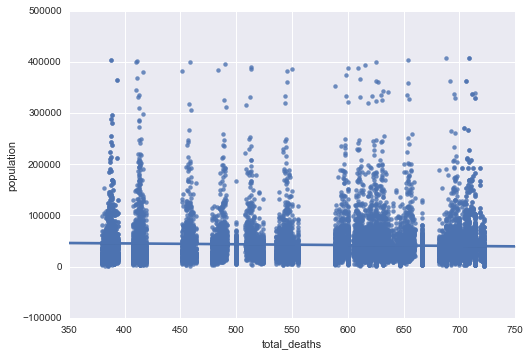

In [8]:
import seaborn as sns
cdc_99_14['total_deaths'] = (1/cdc_99_14['pct_total_deaths'])*cdc_99_14['deaths']

sns.regplot(cdc_99_14['total_deaths'], cdc_99_14['population'])

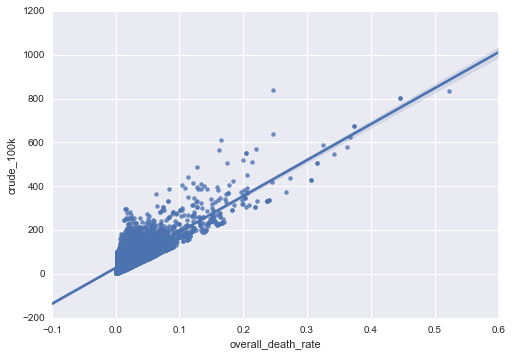

In [9]:
cdc_99_14['overall_death_rate'] = cdc_99_14['total_deaths']/cdc_99_14['population']
sns.regplot(cdc_99_14['overall_death_rate'],cdc_99_14['crude_100k'])

#strong correlation between overall death rate and crude rate per 100k people

In [10]:
from collections import defaultdict

# early_pops = defaultdict(int)

# early_pops[cdc_2003['County Code']] == cdc_2003['Population']


cdc_grouped_county_sum = cdc_99_14.groupby(by=['County'], sort=1).sum() # cant use crude_100k or pct_total_deaths on this
cdc_grouped_county_mean = cdc_99_14.groupby(by=['County'], sort=1).mean() # CAN use crude_100k or pct_total_deaths on this

cdc_grouped_county_sum.head()

,County Code,Deaths,year,pct_total_deaths,deaths,population,crude_100k,total_deaths,overall_death_rate
County,,,,,,,,,
"Ada County, ID",512032.0,382.0,64264,0.720,382.0,728411.0,1700.055807,17761.595550,0.788312
"Adams County, CO",416052.0,729.0,104433,1.300,729.0,930687.0,4114.295324,30103.350270,1.714104
"Alachua County, FL",24002.0,20.0,4014,0.035,20.0,20126.0,198.751517,1166.666667,0.116009
"Alameda County, CA",828138.0,2382.0,276970,4.431,2382.0,4430752.0,9124.246207,76937.611247,3.302389
"Albany County, NY",108003.0,32.0,6039,0.071,32.0,48277.0,200.238697,1451.425729,0.089207


In [11]:
cdc_grouped_county_mean.head()



#lets impute 2003 population data into each missing population file, assuming it didn't change too much in 4 years
#first test the difference between 2011, 2007 and 2003 population data to see if this is a safe assumption
#going to wait till all data merged

,County Code,Deaths,year,pct_total_deaths,deaths,population,crude_100k,total_deaths,overall_death_rate
County,,,,,,,,,
"Ada County, ID",16001.0,11.937500,2008.250000,0.022500,11.937500,22762.843750,53.126744,555.049861,0.024635
"Adams County, CO",8001.0,14.019231,2008.326923,0.025000,14.019231,17897.826923,79.121064,578.910582,0.032964
"Alachua County, FL",12001.0,10.000000,2007.000000,0.017500,10.000000,10063.000000,99.375759,583.333333,0.058005
"Alameda County, CA",6001.0,17.260870,2007.028986,0.032109,17.260870,32106.898551,66.117726,557.518922,0.023930
"Albany County, NY",36001.0,10.666667,2013.000000,0.023667,10.666667,16092.333333,66.746232,483.808576,0.029736


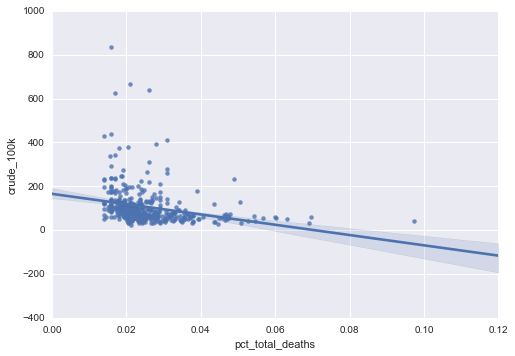

In [12]:
import seaborn as sns

sns.regplot(cdc_grouped_county_mean['pct_total_deaths'], cdc_grouped_county_mean['crude_100k'])
    

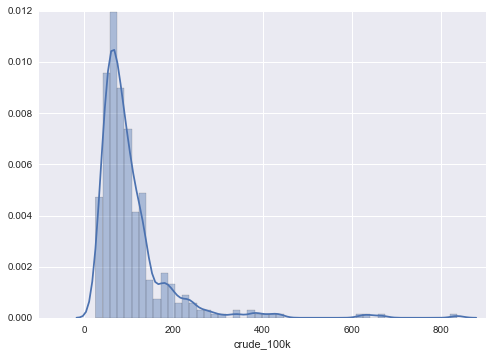

In [13]:
sns.distplot(cdc_grouped_county_mean['crude_100k'])

#histogram visualization of the average crude rate by county, averaged over the 15 years


In [14]:
cdc_grouped_county_mean['crude_100k'].tail()

County
Yellowstone County, MT    143.513203
Yolo County, CA           165.860132
York County, ME            70.137475
York County, PA            52.008418
York County, SC            80.945003
Name: crude_100k, dtype: float64

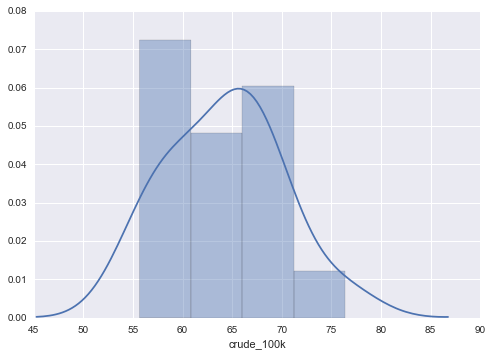

In [15]:
cdc_grouped_county_mean = cdc_99_14.groupby(by=['year'], sort=1).mean()
sns.distplot(cdc_grouped_county_mean['crude_100k'])

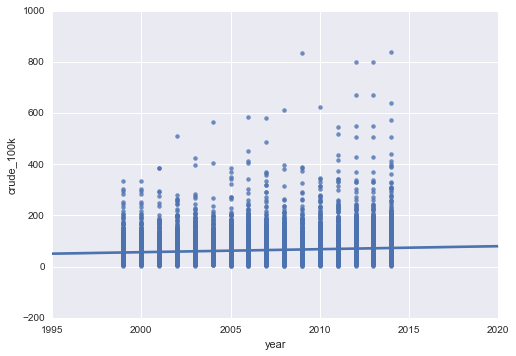

In [16]:
sns.regplot(cdc_99_14['year'], cdc_99_14['crude_100k'])

## Start using pivotables for getting demographic looks

need to be able to aggregate at the county level and find 
1)what proportion of each demographic group the population is
2) what proportion of deaths each demographic group represents

## Begin Time Series Analysis Here - SARIMA 



In [17]:
cdc_99_14

,Notes,County,County Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Hispanic Origin,...,% of Total Deaths,year,pct_total_deaths,deaths,population,crude_100k,county_id,state,total_deaths,overall_death_rate
0,NaN,"Jefferson County, AL",1073.0,15-24 years,15-24,Male,M,White,2106-3,Not Hispanic or Latino,...,0.027%,2014,0.027,11.0,19306.0,56.977106,1073,AL,407.407407,0.021103
1,NaN,"Jefferson County, AL",1073.0,25-34 years,25-34,Female,F,White,2106-3,Not Hispanic or Latino,...,0.039%,2014,0.039,16.0,23590.0,67.825350,1073,AL,410.256410,0.017391
2,NaN,"Jefferson County, AL",1073.0,25-34 years,25-34,Male,M,White,2106-3,Not Hispanic or Latino,...,0.065%,2014,0.065,27.0,22917.0,117.816468,1073,AL,415.384615,0.018126
3,NaN,"Jefferson County, AL",1073.0,35-44 years,35-44,Female,F,White,2106-3,Not Hispanic or Latino,...,0.053%,2014,0.053,22.0,20774.0,105.901608,1073,AL,415.094340,0.019981
4,NaN,"Jefferson County, AL",1073.0,35-44 years,35-44,Male,M,White,2106-3,Not Hispanic or Latino,...,0.063%,2014,0.063,26.0,21104.0,123.199393,1073,AL,412.698413,0.019555
5,NaN,"Jefferson County, AL",1073.0,45-54 years,45-54,Female,F,White,2106-3,Not Hispanic or Latino,...,0.046%,2014,0.046,19.0,23482.0,80.913040,1073,AL,413.043478,0.017590
6,NaN,"Jefferson County, AL",1073.0,45-54 years,45-54,Male,M,White,2106-3,Not Hispanic or Latino,...,0.078%,2014,0.078,32.0,22839.0,140.111213,1073,AL,410.256410,0.017963
7,NaN,"Jefferson County, AL",1073.0,55-64 years,55-64,Female,F,White,2106-3,Not Hispanic or Latino,...,0.029%,2014,0.029,12.0,25098.0,47.812575,1073,AL,413.793103,0.016487
8,NaN,"Jefferson County, AL",1073.0,55-64 years,55-64,Male,M,Black or African American,2054-5,Not Hispanic or Latino,...,0.024%,2014,0.024,10.0,15872.0,63.004032,1073,AL,416.666667,0.026252
9,NaN,"Jefferson County, AL",1073.0,55-64 years,55-64,Male,M,White,2106-3,Not Hispanic or Latino,...,0.080%,2014,0.080,33.0,23237.0,142.014890,1073,AL,412.500000,0.017752


In [2]:
import pandas as pd

def accident_clean(pop):
    pop = str(pop)
    pop = pop.replace(",", "")
    try:
        return float(pop)
    except: 
        return 'error'

accidents = pd.read_csv('/Users/HudsonCavanagh/Dropbox/Capstone/cdc_data/accidents_01-14.csv')

accidents = accidents[accidents['Age Group']!='Unknown yr']
accidents['Injuries'] = accidents['Injuries'].apply(lambda x: float(x))
accidents['Population'] = accidents['Population'].apply(lambda x: accident_clean(x))



accidents['inj_rate_100k']= accidents['Injuries']/(accidents['Population']/1000000)
# accidents

#group this by the same age ranges and merge as a feature 

accidents

,Sex,Race/Ethnicity,Age Group,First Year,Last Year,Cause of Death,Year,Injuries,Population,records,cv,Crude Rate,Number of$Records,Standard$Error,CV,Lower 95%$Confidence$Limit,Upper 95%$Confidence$Limit,inj_rate_100k
0,Both Sexes,All Races,00-04 yrs,2001,2014,Overall All Injury Causes,2001,2.432337e+06,19298217.0,54376,0.104208,12603.946648726,54376,253469.601583,0.104208,1.935537e+06,2.929137e+06,126039.466487
1,Both Sexes,All Races,05-09 yrs,2001,2014,Overall All Injury Causes,2001,2.131767e+06,20173362.0,44287,0.096705,10567.2389232488,44287,206152.265019,0.096705,1.727709e+06,2.535826e+06,105672.389232
2,Both Sexes,All Races,10-14 yrs,2001,2014,Overall All Injury Causes,2001,2.686160e+06,20978678.0,50624,0.072003,12804.2384590617,50624,193410.350367,0.072003,2.307076e+06,3.065244e+06,128042.384591
3,Both Sexes,All Races,15-19 yrs,2001,2014,Overall All Injury Causes,2001,3.103295e+06,20456284.0,49332,0.052226,15170.3730262981,49332,162072.192020,0.052226,2.785633e+06,3.420956e+06,151703.730263
4,Both Sexes,All Races,20-24 yrs,2001,2014,Overall All Injury Causes,2001,2.980104e+06,19757286.0,43745,0.074603,15083.5688844116,43745,222324.219525,0.074603,2.544348e+06,3.415859e+06,150835.688844
5,Both Sexes,All Races,25-29 yrs,2001,2014,Overall All Injury Causes,2001,2.426290e+06,18819347.0,35960,0.052964,12892.532284047,35960,128505.268711,0.052964,2.174420e+06,2.678161e+06,128925.322840
6,Both Sexes,All Races,30-34 yrs,2001,2014,Overall All Injury Causes,2001,2.397303e+06,20652175.0,35374,0.041405,11607.9920855296,35374,99261.382299,0.041405,2.202751e+06,2.591855e+06,116079.920855
7,Both Sexes,All Races,35-39 yrs,2001,2014,Overall All Injury Causes,2001,2.334650e+06,22235918.0,34002,0.046166,10499.4535684456,34002,107780.752068,0.046166,2.123400e+06,2.545900e+06,104994.535684
8,Both Sexes,All Races,40-44 yrs,2001,2014,Overall All Injury Causes,2001,2.106941e+06,22815834.0,30734,0.041488,9234.5559171688,30734,87413.548447,0.041488,1.935610e+06,2.278272e+06,92345.559172
9,Both Sexes,All Races,45-49 yrs,2001,2014,Overall All Injury Causes,2001,1.666740e+06,20698983.0,24289,0.044807,8052.27757472487,24289,74681.785044,0.044807,1.520363e+06,1.813116e+06,80522.775747


####  Above should be used for graphical analysis to test whether hypothesis that increase in accidents is driving pain meds perscrips

## Start making demographic, state dummies

1) classify for each demographic group whether they will be above the national mean (need dummies for each demo line)
2) classify for each demographic group whether they will increase from year before
3) regression for each county crude rate (need figures for proportion of demographic groups in county_

In [19]:
#for merging, need to clean county code
from collections import defaultdict
# import defaultdict

def county_cleaner(county):
    county = str(county).split(".")[0]
    if len(county) == 4:
        county = '0' + county
    return county

cdc_99_14['county_code'] = cdc_99_14['County Code'].apply(county_cleaner)



#### Grabbing county - code conversions for later

In [20]:
ccodes = cdc_99_14.loc[:,['county_code', 'County']] #grabbing this 
ccodes.index=ccodes['county_code']
ccodes = ccodes.iloc[:,1:]
ccodes = ccodes.to_dict()
ccodes = ccodes['County']
ccodes['01073'] #test
# cdc_99_14.head()

u'Jefferson County, AL'

## Decided to simplify this (at least for now)

1) Going to make two targets for model, deaths by county-year and death rate(per 100k) by county-year
2) Can easy go back and use, for example, white male deaths by county if of interest
3) Because I'm going to merge on demographic data for each county below, I don't necessarily need to retain the victims demographic for this analysis (although awesome for EDA and summary) 


In [21]:

# cdc_99_14['year']


In [22]:
attempt_pivot =pd.pivot_table(cdc_99_14, values=['population', 'deaths'], index=['County','year', 'Ten-Year Age Groups Code', 'Gender Code', 'Race', 'Hispanic Origin'], aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All')
# attempt_pivot #this won't work because it doesn't have zero values
#need to re-merge population data onto deaths because this population data does not add up
#appears that it accurately describes the subgroup, but does not sum properly
death_rate_pivot =pd.pivot_table(cdc_99_14, values=['crude_100k'], index=['County','year'], aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')

## Loading population data by county
http://www.census.gov/popest/data/counties/asrh/2015/CC-EST2015-ALLDATA.html -15


## Merging Datasets

For poverty and unemployment data, combine state FIPS Code and County Fips code for county code in CDC data

CDC county code needs to be transformed:
-remove float
-add 0 at the beginning of first ten states
-may also want to try by extracting county name from each row

In [23]:
cdc_99_14['CTYNAME'] = cdc_99_14['County'].apply(lambda x: x.split(",")[0].strip(" "))
cdc_99_14['year'] = cdc_99_14['year'].apply(lambda x: str(x))
cdc_99_14['pop_merge_ind'] = cdc_99_14['CTYNAME'] + "_" + cdc_99_14['year']
cdc_99_14['pop_merge_ind'][1]

1    Jefferson County_2014
1       Greene County_2014
1    Jefferson County_2013
1    Jefferson County_2012
1    Jefferson County_2011
1    Jefferson County_2010
1    Jefferson County_2009
1    Jefferson County_2008
1    Jefferson County_2007
1    Jefferson County_2006
1    Jefferson County_2005
1    Jefferson County_2004
1    Jefferson County_2003
1    Jefferson County_2002
1    Jefferson County_2001
1    Jefferson County_2000
1    Jefferson County_1999
Name: pop_merge_ind, dtype: object

In [24]:
death_count_pivot = pd.pivot_table(cdc_99_14, values=['deaths'], index=['CTYNAME','year'], aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All')


### Population Dataset explanation:
http://www.census.gov/popest/data/counties/asrh/2015/files/CC-EST2015-ALLDATA.pdf

BAC_Male = black, alone or in combination


In [25]:
def age_grp_clean(age):
    if age == 0:
        return 'total'
    if age == 1:
        return 'age_0-4'
    if age == 2:
        return 'age_5-14'
    if age == 3:
        return 'age_5-14'
    if age == 4:
        return 'age_15-24'
    if age == 5:
        return 'age_15-24'
    if age == 6:
        return 'age_25-34'
    if age == 7:
        return 'age_25-34'
    if age == 8:
        return 'age_35-44'
    if age == 9:
        return 'age_35-44'
    if age == 10:
        return 'age_45-54'
    if age == 11:
        return 'age_45-54'
    if age == 12:
        return 'age_55-64'
    if age == 13:
        return 'age_55-64'
    if age == 14:
        return 'age_65-74'
    if age == 15:
        return 'age_65-74'
    if age == 16:
        return 'age_75-84'
    if age == 17:
        return 'age_75-84'
    if age == 18:
        return 'age_85+'
    
def year_clean(year):
    if year == 1:
        return '2010_census'
    if year == 2:
        return '2010_pop_est_base'
    if year == 3:
        return '2010'
    if year == 4:
        return '2011'
    if year == 5:
        return '2012'
    if year == 6:
        return '2013'
    if year == 7:
        return '2014'
    if year == 8:
        return '2015'
 

pop_15 = pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pop_data_15.csv")

def pop_df_clean(df):
    df['age'] = df['AGEGRP'].apply(lambda x:age_grp_clean(x))
    df['year'] = df['YEAR'].apply(lambda x: year_clean(x))
    df['AGEGRP'] = df['AGEGRP'].apply(lambda x: int(x))
    df['pop_sub_15'] = df['TOT_POP'] * df['AGEGRP'].apply(lambda x: 1 if x in (1,2,3) else 0)
    df['pop_15-34'] = df['TOT_POP'] * df['AGEGRP'].apply(lambda x: 1 if x in (4,5,6,7) else 0)
    df['pop_35-54'] = df['TOT_POP'] * df['AGEGRP'].apply(lambda x: 1 if x in (8,9,10,11) else 0)
    df['pop_55+'] = df['TOT_POP'] * df['AGEGRP'].apply(lambda x: 1 if x >= 12 else 0)
    df['pop_black'] = df['BAC_MALE'] +  df['BAC_FEMALE']
    df['pop_white'] = df['WA_MALE'] +  df['WA_FEMALE']
    df['pop_hisp'] = df['H_MALE'] +  df['H_FEMALE']
    return df


pop_15['age'] = pop_15['AGEGRP'].apply(lambda x:age_grp_clean(x))
pop_15['year'] = pop_15['YEAR'].apply(lambda x: year_clean(x))
pop_15['AGEGRP'] = pop_15['AGEGRP'].apply(lambda x: int(x))
pop_15['pop_sub_15'] = pop_15['TOT_POP'] * pop_15['AGEGRP'].apply(lambda x: 1 if x in (1,2,3) else 0)
pop_15['pop_15-34'] = pop_15['TOT_POP'] * pop_15['AGEGRP'].apply(lambda x: 1 if x in (4,5,6,7) else 0)
pop_15['pop_35-54'] = pop_15['TOT_POP'] * pop_15['AGEGRP'].apply(lambda x: 1 if x in (8,9,10,11) else 0)
pop_15['pop_55+'] = pop_15['TOT_POP'] * pop_15['AGEGRP'].apply(lambda x: 1 if x >= 12 else 0)
pop_15['pop_black'] = pop_15['BAC_MALE'] +  pop_15['BAC_FEMALE']
pop_15['pop_white'] = pop_15['WA_MALE'] +  pop_15['WA_FEMALE']
pop_15['pop_hisp'] = pop_15['H_MALE'] +  pop_15['H_FEMALE']
pop_15['pop_asian'] = pop_15['AA_MALE'] +  pop_15['AA_FEMALE']

# pop_15['pop%_men'] = pop_15['TOT_MALE']/  pop_15['TOT_POP']
# pop_15['pop%_sub_15'] = pop_15['pop_sub_15']/ pop_15['TOT_POP']
# pop_15['pop%_15-34'] = pop_15['pop_15-34']/ pop_15['TOT_POP']
# pop_15['pop%_35-54'] = pop_15['pop_35-54']/ pop_15['TOT_POP']
# pop_15['pop%_55+'] = pop_15['pop_55+']/ pop_15['TOT_POP']
# pop_15['pop%_black'] = pop_15['pop_black']/ pop_15['TOT_POP']
# pop_15['pop_white'] = pop_15['pop_white']/ pop_15['TOT_POP']
# pop_15['pop_hisp'] = pop_15['pop_hisp']/ pop_15['TOT_POP']


pop_15['pop_merge_ind'] = pop_15['CTYNAME'] + "_" + pop_15['year']

##pd.concat more population figures!! HERE


pop_15['pop_merge_ind'].value_counts()

Washington County_2010_census          570
Washington County_2010_pop_est_base    570
Washington County_2010                 570
Washington County_2012                 570
Washington County_2011                 570
Washington County_2013                 570
Washington County_2014                 570
Washington County_2015                 570
Jefferson County_2010                  475
Jefferson County_2014                  475
Jefferson County_2013                  475
Jefferson County_2012                  475
Jefferson County_2011                  475
Jefferson County_2010_census           475
Jefferson County_2015                  475
Jefferson County_2010_pop_est_base     475
Franklin County_2010_pop_est_base      456
Franklin County_2013                   456
Franklin County_2010                   456
Franklin County_2011                   456
Franklin County_2014                   456
Franklin County_2015                   456
Franklin County_2010_census            456
Franklin Co

### Trying to get demographic data for each county going back to 2003

-- years before 2010 are in a different format, either downloadable with all features at state level, or like below

#Census website renovation?? http://www.census.gov/popest/data/intercensal/county/CO-EST00INT-alldata.html

NameError: name 'pop_10_15' is not defined

In [ ]:
pop_10 = pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pop_data_10.csv")
# pop_10.head(20)
pop_10_age = pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pop_10_age_sex.csv")
# pop_test = pop_df_clean(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pop_mass.csv"))

# tri= [(pop_04, 'POPESTIMATE2004', 2004),(pop_05, 'POPESTIMATE2005', 2005)]

def pop_clean_analyze(pop_10, pop_10_age, df_name, col, year):
    df_name = pop_10_age[['CTYNAME', 'STNAME', 'STATE', 'COUNTY', 'SEX', 'AGEGRP', col]]
    pop_race = pop_10[['CTYNAME', 'STNAME', 'STATE', 'COUNTY', 'ORIGIN', 'RACE', col]]
    df_name = pd.merge(df_name, pop_race, how='left', on=['COUNTY', 'STATE'], copy=False)
    df_name['year'] = year
    df_name.columns = ['CTYNAME', 'STNAME_x', 'STATE', 'COUNTY', 'SEX', 'AGEGRP','population_age_sex', 'del', 'del', 'ORIGIN', 'RACE','population_race_hisp', u'year']
    df_name['population_age_sex'] = df_name['population_age_sex'].apply(lambda x: float(x))
    df_name['population_race_hisp'] = df_name['population_race_hisp'].apply(lambda x: float(x))
    df_name['sex'] = df_name['SEX'].apply(lambda x: int(x))
    df_name['hisp'] = df_name['ORIGIN'].apply(lambda x: int(x))
    df_name['race'] = df_name['RACE'].apply(lambda x: int(x))
    df_name['year_str'] = df_name['year'].apply(lambda x: str(x))
    df_name['pop_merge_ind'] = df_name['CTYNAME'] + "_" + df_name['year_str']
    df_name['age_group'] = df_name['AGEGRP'].apply(lambda x: int(x))
    df_name['pop_sub_15'] = df_name['population_age_sex'] * df_name['age_group'].apply(lambda x: 1 if x in (1,2,3) else 0)
    df_name['pop_15-34'] = df_name['population_age_sex'] * df_name['age_group'].apply(lambda x: 1 if x in (4,5,6,7) else 0)
    df_name['pop_35-54'] = df_name['population_age_sex'] * df_name['age_group'].apply(lambda x: 1 if x in (8,9,10,11) else 0)
    df_name['pop_55+'] = df_name['population_age_sex'] * df_name['age_group'].apply(lambda x: 1 if x >= 12 else 0)
    df_name['pop_male'] = df_name['population_age_sex'] * df_name['sex'].apply(lambda x: 1 if x == 1 else 0)
    df_name['pop_white'] = df_name['population_age_sex'] * df_name['race'].apply(lambda x: 1 if x == 1 else 0)
    df_name['pop_black'] = df_name['population_age_sex'] * df_name['race'].apply(lambda x: 1 if x == 2 else 0)
    df_name['pop_hisp'] = df_name['population_age_sex'] * df_name['hisp'].apply(lambda x: 1 if x == 1 else 0)
    df_name['pop_asian'] = df_name['population_age_sex'] * df_name['race'].apply(lambda x: 1 if x == 4 else 0)
    return df_name

pop_04 = pd.DataFrame()
pop_04 = pop_clean_analyze(pop_10, pop_10_age, pop_04, 'POPESTIMATE2004', 2004)
pop_04.head(75)
#now need to clean method for merging

,CTYNAME,STNAME_x,STATE,COUNTY,SEX,AGEGRP,population_age_sex,del,del,ORIGIN,...,pop_hisp,pop_asian,pop%_men,pop%_sub_15,pop%_15-34,pop%_35-54,pop%_55+,pop%_black,pop%_white,pop%_hisp
0,Autauga County,Alabama,1,1,0,0,48366.0,Autauga County,Alabama,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,Autauga County,Alabama,1,1,0,0,48366.0,Autauga County,Alabama,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.243566,0.000000
2,Autauga County,Alabama,1,1,0,0,48366.0,Autauga County,Alabama,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.762659,0.000000,0.000000
3,Autauga County,Alabama,1,1,0,0,48366.0,Autauga County,Alabama,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,Autauga County,Alabama,1,1,0,0,48366.0,Autauga County,Alabama,0,...,0.0,48366.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,Autauga County,Alabama,1,1,0,0,48366.0,Autauga County,Alabama,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,Autauga County,Alabama,1,1,0,0,48366.0,Autauga County,Alabama,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
7,Autauga County,Alabama,1,1,0,0,48366.0,Autauga County,Alabama,1,...,48366.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.018296
8,Autauga County,Alabama,1,1,0,0,48366.0,Autauga County,Alabama,1,...,48366.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.268483,1.268483
9,Autauga County,Alabama,1,1,0,0,48366.0,Autauga County,Alabama,1,...,48366.0,0.0,0.0,0.0,0.0,0.0,0.0,5.801367,0.000000,5.801367


In [ ]:
pop_03 = pd.DataFrame()
pop_03 = pop_clean_analyze(pop_10, pop_10_age, pop_03, 'POPESTIMATE2003', 2003)

pop_04 = pd.DataFrame()
pop_04 = pop_clean_analyze(pop_10, pop_10_age, pop_03, 'POPESTIMATE2004', 2004)

pop_05 = pd.DataFrame()
pop_05 = pop_clean_analyze(pop_10, pop_10_age, pop_03, 'POPESTIMATE2005', 2005)

pop_06 = pd.DataFrame()
pop_06 = pop_clean_analyze(pop_10, pop_10_age, pop_03, 'POPESTIMATE2006', 2006)

pop_07 = pd.DataFrame()
pop_07 = pop_clean_analyze(pop_10, pop_10_age, pop_03, 'POPESTIMATE2007', 2007)


pop_08 = pd.DataFrame()
pop_08 = pop_clean_analyze(pop_10, pop_10_age, pop_03, 'POPESTIMATE2008', 2008)

pop_09 = pd.DataFrame()
pop_09 = pop_clean_analyze(pop_10, pop_10_age, pop_03, 'POPESTIMATE2009', 2009)


In [ ]:
# pop_10 = pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pop_data_10.csv")
# pop_10_age = pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pop_10_age_sex.csv")

# pop_03 = pop_10_age[['CTYNAME', 'STNAME', 'STATE', 'COUNTY', 'SEX', 'AGEGRP', 'POPESTIMATE2003']]
# pop_race_03 = pop_10[['CTYNAME', 'STNAME', 'STATE', 'COUNTY', 'ORIGIN', 'RACE', 'POPESTIMATE2003']]
# pop_03 = pd.merge(pop_03, pop_race_03, how='left', on=['COUNTY', 'STATE'], copy=False)
# pop_03['year'] = 2003
# pop_03.columns = ['CTYNAME', 'STNAME_x', 'STATE', 'COUNTY', 'SEX', 'AGEGRP','population_age_sex', 'del', 'del', 'ORIGIN', 'RACE','population_race_hisp', u'year']
# pop_03['population_age_sex'] = pop_03['population_age_sex'].apply(lambda x: float(x))
# pop_03['population_race_hisp'] = pop_03['population_race_hisp'].apply(lambda x: float(x))
# pop_03['sex'] = pop_03['SEX'].apply(lambda x: int(x))
# pop_03['hisp'] = pop_03['ORIGIN'].apply(lambda x: int(x))
# pop_03['race'] = pop_03['RACE'].apply(lambda x: int(x))

# pop_03['year_str'] = pop_03['year'].apply(lambda x: str(x))
# pop_03['pop_merge_ind'] = pop_03['CTYNAME'] + "_" + pop_03['year_str']

# pop_03['pop_sub_15'] = pop_03['population_age_sex'] * pop_03['AGEGRP'].apply(lambda x: 1 if x in (1,2,3) else 0)
# pop_03['pop_15-34'] = pop_03['population_age_sex'] * pop_03['AGEGRP'].apply(lambda x: 1 if x in (4,5,6,7) else 0)
# pop_03['pop_35-54'] = pop_03['population_age_sex'] * pop_03['AGEGRP'].apply(lambda x: 1 if x in (8,9,10,11) else 0)
# pop_03['pop_55+'] = pop_03['population_age_sex'] * pop_03['AGEGRP'].apply(lambda x: 1 if x >= 12 else 0)
# pop_03.head()
# #THIS WORKS!!!!

In [ ]:
pop_03_g = pop_03.groupby(['year', 'CTYNAME'], axis=0).sum()
pop_04_g = pop_04.groupby(['year', 'CTYNAME'], axis=0).sum()
pop_05_g = pop_05.groupby(['year', 'CTYNAME'], axis=0).sum()
pop_06_g = pop_06.groupby(['year', 'CTYNAME'], axis=0).sum()
pop_07_g = pop_07.groupby(['year', 'CTYNAME'], axis=0).sum()
pop_08_g = pop_08.groupby(['year', 'CTYNAME'], axis=0).sum()
pop_09_g = pop_09.groupby(['year', 'CTYNAME'], axis=0).sum()
pop_10_15 = pop_15.groupby(['year', 'CTYNAME'], axis=0).sum()

pop_03_15 = pd.concat([pop_03_g, pop_04_g, pop_05_g, pop_06_g, pop_07_g, pop_08_g, pop_09_g, pop_10_15]) #this works 1) need to make floats 2) need more data


pop_03_15['pop%_men'] = pop_03_15['pop_male']/  pop_03_15['population_age_sex']
pop_03_15['pop%_sub_15'] = pop_03_15['pop_sub_15']/ pop_03_15['population_age_sex']
pop_03_15['pop%_15-34'] = pop_03_15['pop_15-34']/ pop_03_15['population_age_sex']
pop_03_15['pop%_35-54'] = pop_03_15['pop_35-54']/ pop_03_15['population_age_sex']
pop_03_15['pop%_55+'] = pop_03_15['pop_55+']/ pop_03_15['population_age_sex']
pop_03_15['pop%_black'] = pop_03_15['pop_black']/ pop_03_15['population_race_hisp']
pop_03_15['pop%_white'] = pop_03_15['pop_white']/ pop_03_15['population_race_hisp']
pop_03_15['pop%_hisp'] = pop_03_15['pop_hisp']/ pop_03_15['population_race_hisp']
pop_03_15['pop%_asian'] = pop_03_15['pop_asian']/ pop_03_15['population_race_hisp']

# pop_03_15.isnull().sum()

pop_03_15.head(75)


# pop_03_15['pop%_men'] = pop_03_15['TOT_MALE']/  deaths_pop['TOT_POP']
# pop_03_15['pop%_sub_15'] = deaths_pop['pop_sub_15']/ deaths_pop['TOT_POP']
# pop_03_15['pop%_15-34'] = deaths_pop['pop_15-34']/ deaths_pop['TOT_POP']
# pop_03_15['pop%_35-54'] = deaths_pop['pop_35-54']/ deaths_pop['TOT_POP']
# pop_03_15['pop%_55+'] = deaths_pop['pop_55+']/ deaths_pop['TOT_POP']
# pop_03_15['pop%_black'] = deaths_pop['pop_black']/ deaths_pop['TOT_POP']
# pop_03_15['pop%_white'] = deaths_pop['pop_white']/ deaths_pop['TOT_POP']
# pop_03_15['pop%_hisp'] = deaths_pop['pop_hisp']/ deaths_pop['TOT_POP']


In [35]:
#CANT MERGE pop_03_15 yet because  cdc_99_14 need to be grouped by first
cdc_99_14['pop_merge_ind'] = cdc_99_14['pop_merge_ind'].apply(lambda x: str(x))
death_pop = cdc_99_14.merge(pop_03_15, how='left', left_on=['CTYNAME', 'year'], right_index=1)#WORKS!


In [36]:
death_pop

,Notes,County,County Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Hispanic Origin,...,pop_asian,pop_black,pop_hisp,pop_male,pop_sub_15,pop_white,population_age_sex,population_race_hisp,race,sex
0,NaN,"Jefferson County, AL",1073.0,15-24 years,15-24,Male,M,White,2106-3,Not Hispanic or Latino,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"Jefferson County, AL",1073.0,25-34 years,25-34,Female,F,White,2106-3,Not Hispanic or Latino,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,"Jefferson County, AL",1073.0,25-34 years,25-34,Male,M,White,2106-3,Not Hispanic or Latino,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,"Jefferson County, AL",1073.0,35-44 years,35-44,Female,F,White,2106-3,Not Hispanic or Latino,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,"Jefferson County, AL",1073.0,35-44 years,35-44,Male,M,White,2106-3,Not Hispanic or Latino,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,"Jefferson County, AL",1073.0,45-54 years,45-54,Female,F,White,2106-3,Not Hispanic or Latino,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,"Jefferson County, AL",1073.0,45-54 years,45-54,Male,M,White,2106-3,Not Hispanic or Latino,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,"Jefferson County, AL",1073.0,55-64 years,55-64,Female,F,White,2106-3,Not Hispanic or Latino,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,"Jefferson County, AL",1073.0,55-64 years,55-64,Male,M,Black or African American,2054-5,Not Hispanic or Latino,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,"Jefferson County, AL",1073.0,55-64 years,55-64,Male,M,White,2106-3,Not Hispanic or Latino,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
death_pop['county_code'] = death_pop['county_code'].apply(lambda x: str(x))
deaths_pop = death_pop.groupby(by=['year', 'county_code']).sum()
deaths_pop['pop%_men'] = deaths_pop['TOT_MALE']/  deaths_pop['TOT_POP']
deaths_pop['pop%_sub_15'] = deaths_pop['pop_sub_15']/ deaths_pop['TOT_POP']
deaths_pop['pop%_15-34'] = deaths_pop['pop_15-34']/ deaths_pop['TOT_POP']
deaths_pop['pop%_35-54'] = deaths_pop['pop_35-54']/ deaths_pop['TOT_POP']
deaths_pop['pop%_55+'] = deaths_pop['pop_55+']/ deaths_pop['TOT_POP']
deaths_pop['pop%_black'] = deaths_pop['pop_black']/ deaths_pop['TOT_POP']
deaths_pop['pop%_white'] = deaths_pop['pop_white']/ deaths_pop['TOT_POP']
deaths_pop['pop%_hisp'] = deaths_pop['pop_hisp']/ deaths_pop['TOT_POP']
# deaths_pop['pop%_white'] #this works for listed years!

## Loading County level unemployment data (and workforce size by county) below

here is source:

http://www.bls.gov/lau/#cntyaa



In [38]:
#Clean & merge unemployment data

def unemp_col_clean(fig):
    fig = str(fig)
    fig = fig.replace(",", "").strip(" ")
    try:
        return float(fig)
    except: 
        return np.nan

def unemp_fix(df):
    unemp_cols = ['unknown_code', 'state_code', 'cout_code', 'county_state', 'year', 'nan', 'working_pop', 'employed_pop', 'unemployed_pop', 'unemp_perc']
    df = df.iloc[3:,0:]
    df.columns= unemp_cols
    df = df[2:]
    df['county_code'] = df['state_code'] + df['cout_code']# need to clean this
    df['county_code'] = df['county_code'].apply(lambda x: str(x))
    df['working_pop'] = df['working_pop'].apply(unemp_col_clean)
    df['employed_pop'] = df['employed_pop'].apply(unemp_col_clean)
    df['unemployed_pop'] = df['unemployed_pop'].apply(unemp_col_clean)
    df['unemp_perc'] = df['unemp_perc'].apply(unemp_col_clean)
    return df





# unemp_98 = unemp_fix(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/unemp_98.csv", encoding='utf-8'))
# unemp_99 = unemp_fix(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/unemp_99.csv"))
# unemp_00 = unemp_fix(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/unemp_00.csv"))
# unemp_01 = unemp_fix(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/unemp_01.csv"))
# unemp_02 = unemp_fix(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/unemp_02.csv"))
unemp_03 = unemp_fix(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/unemp_03.csv"))
unemp_04 = unemp_fix(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/unemp_04.csv"))
unemp_05 = unemp_fix(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/unemp_05.csv"))
unemp_06 = unemp_fix(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/unemp_06.csv"))
unemp_07 = unemp_fix(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/unemp_07.csv"))
unemp_08 = unemp_fix(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/unemp_08.csv"))
unemp_09 = unemp_fix(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/unemp_09.csv"))
unemp_10 = unemp_fix(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/unemp_10.csv"))
unemp_11 = unemp_fix(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/unemp_11.csv"))
unemp_12 = unemp_fix(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/unemp_12.csv"))
unemp_13 = unemp_fix(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/unemp_13.csv"))
unemp_14 = unemp_fix(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/unemp_14.csv"))
unemp_15 = unemp_fix(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/unemp_15.csv"))

unemp_03.head()


#ADD MORE UNEMP FIGURES WHEN DOWNLOADED




,unknown_code,state_code,cout_code,county_state,year,nan,working_pop,employed_pop,unemployed_pop,unemp_perc,county_code
5,CN0100100000000,01,001,"Autauga County, AL",2003,NaN,22604.0,21462.0,1142.0,5.1,01001
6,CN0100300000000,01,003,"Baldwin County, AL",2003,NaN,72299.0,68702.0,3597.0,5.0,01003
7,CN0100500000000,01,005,"Barbour County, AL",2003,NaN,10977.0,10196.0,781.0,7.1,01005
8,CN0100700000000,01,007,"Bibb County, AL",2003,NaN,8836.0,8309.0,527.0,6.0,01007
9,CN0100900000000,01,009,"Blount County, AL",2003,NaN,25900.0,24702.0,1198.0,4.6,01009


In [ ]:


unemp_tot = pd.concat([unemp_03,unemp_04, unemp_05,unemp_06, unemp_07,unemp_08, unemp_09,unemp_10,unemp_11,unemp_12,unemp_13,unemp_14], axis=0)
len(unemp_tot)

unemp_tot.dropna(axis=0, subset=['year', 'county_code', 'working_pop', 'employed_pop','unemployed_pop','unemp_perc'], inplace=1)


unemp_tot = unemp_tot.groupby(by=['year', 'county_code']).sum()





# unemp_tot = pd.concat([unemp_98, unemp_99,unemp_00, unemp_01,unemp_02, unemp_03,unemp_04, unemp_05,unemp_06, unemp_07,unemp_08, unemp_09,unemp_10,unemp_11,unemp_12,unemp_13,unemp_14], axis=1)


In [ ]:
# unemp_tot

In [ ]:

unemp_tot.reset_index(inplace=1)
deaths_pop.reset_index(inplace=1)
deaths_pop = pd.merge(deaths_pop, unemp_tot, how='left', left_on=['year', 'county_code'], right_on=['year', 'county_code'])

deaths_pop.columns

In [ ]:
deaths_pop['perc_pop_employed'] = deaths_pop['employed_pop']/deaths_pop['population']
deaths_pop['unemp_rate'] = deaths_pop['employed_pop']/deaths_pop['working_pop']
deaths_pop['perc_pop_not_working'] = (deaths_pop['population'] -deaths_pop['working_pop'])/deaths_pop['population']



## Loading Poverty Data by COunty

http://www.census.gov/did/www/saipe/data/statecounty/data/2014.html



In [ ]:

def pov_col_clean(fig):
    fig = str(fig)
    fig = fig.replace(",", "").strip(" ")
    try:
        return float(fig)
    except: 
        return 0.0


def pov_clean(df):
    correct_pov_cols = ['State FIPS Code',
 'County FIPS Code',
 'Postal Code',
 'Name',
 'Poverty Estimate, All Ages',
 '90% CI Lower Bound',
 '90% CI Upper Bound',
 'Poverty Percent, All Ages',
 '90% CI Lower Bound',
 '90% CI Upper Bound',
 'Poverty Estimate, Age 0-17',
 '90% CI Lower Bound',
 '90% CI Upper Bound',
 'Poverty Percent, Age 0-17',
 '90% CI Lower Bound',
 '90% CI Upper Bound',
 'Poverty Estimate, Age 5-17 in Families',
 '90% CI Lower Bound',
 '90% CI Upper Bound',
 'Poverty Percent, Age 5-17 in Families',
 '90% CI Lower Bound',
 '90% CI Upper Bound',
 'Median Household Income',
 '90% CI Lower Bound',
 '90% CI Upper Bound',
 'Poverty Estimate, Age 0-4',
 '90% CI Lower Bound',
 '90% CI Upper Bound',
 'Poverty Percent, Age 0-4',
 '90% CI Lower Bound',
 '90% CI Upper Bound']
    df = df.iloc[2:,:]
    pov_cols = df.iloc[0]
    df = df.iloc[1:,:]
    df.columns = correct_pov_cols
    df['county_code'] = df['State FIPS Code'] + df['County FIPS Code']
    df['county_code'] = df['county_code'].apply(lambda x: str(x))
    df['pov_count_tot'] = df['Poverty Estimate, All Ages'].apply(lambda x: pov_col_clean(x))
    df['pov_rate_tot'] = df['Poverty Percent, All Ages'].apply(lambda x: pov_col_clean(x))
    df['pov_rate_tot'] = df['Poverty Percent, All Ages'].apply(lambda x: pov_col_clean(x))
    df['pov_youth_count_0-17'] = df['Poverty Estimate, Age 0-17'].apply(lambda x: pov_col_clean(x))
    df['pov_youth_rate_0-17'] = df['Poverty Percent, Age 0-17'].apply(lambda x: pov_col_clean(x))
    df['med_hh_income'] = df['Median Household Income'].apply(lambda x: pov_col_clean(x))
    return df

pov_14 = pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pov_14.csv")
pov_14 = pov_clean(pov_14)


pov_03 = pov_clean(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pov_03.csv"))
pov_04 = pov_clean(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pov_04.csv"))
pov_05 = pov_clean(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pov_05.csv"))
pov_06 = pov_clean(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pov_06.csv"))
pov_07 = pov_clean(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pov_07.csv"))
pov_08 = pov_clean(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pov_08.csv"))
pov_09 = pov_clean(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pov_09.csv"))
pov_10 = pov_clean(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pov_10.csv"))
pov_11 = pov_clean(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pov_11.csv"))
pov_12 = pov_clean(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pov_12.csv"))
pov_13 = pov_clean(pd.read_csv("/Users/HudsonCavanagh/Dropbox/Capstone/non_cdc_data/pov_13.csv"))



pov_03['year'] = '2003'
pov_04['year'] = '2004'
pov_05['year'] = '2005'
pov_06['year'] = '2006'
pov_07['year'] = '2007'
pov_08['year'] = '2008'
pov_09['year'] = '2009'
pov_10['year'] = '2010'
pov_11['year'] = '2011'
pov_12['year'] = '2012'
pov_13['year'] = '2013'
pov_14['year'] = '2014'


print(len(pov_03), len(pov_04), len(pov_05),len(pov_06),len(pov_07),len(pov_08),len(pov_09),len(pov_10),len(pov_11),len(pov_12),len(pov_13),len(pov_14))#insert more loaded data here

pov_03_14 = pd.concat([pov_03, pov_04, pov_05,pov_06,pov_07,pov_08,pov_09,pov_10,pov_11,pov_12,pov_13,pov_14], axis=0) #insert more loaded data here
pov_03_14
# pov_03_14 = pov_03_14.iloc[:3191,-7:]

pov_03_14.dropna(axis=0, subset=['year','pov_count_tot', 'pov_rate_tot','pov_youth_rate_0-17','med_hh_income'], inplace=1)
pov_03_14.isnull().sum()



In [ ]:


pov_county_year = pov_03_14.groupby(by=['year', 'county_code']).mean()

pov_county_year.reset_index(inplace=1)
pov_county_year['year'].value_counts()


In [ ]:
type(deaths_pop['county_code'][2])

In [ ]:
pop_03_15.reset_index(inplace=1)

In [ ]:

deaths_pop = pd.merge(deaths_pop, pov_county_year, how='left', left_on=['year','county_code'], right_on=['year','county_code'])
pop_03_15.reset_index(inplace=1) 
deaths_pop = pd.merge(deaths_pop, pop_03_15, how='left', left_on=['year','county_code'], right_on=['year','county_code'])
#MERGING POPULATION DATA TO COMPLETE FEATURES
deaths_pop.head(75)


In [ ]:
deaths_pop.isnull().sum()#looks like 2003-2014 is fully ready to go!


## Merging the population data for 2003 through present



What populations or groups are hard to predict? Why? What are implications?
Compare two close but demographically similar but different outcomes?
What laws (e.g.marijuana legalization) effect 


#### Readding the county name 


In [ ]:
deaths_pop.reset_index(inplace=1)
#note -- ccodes is the dict I created above to reapply the name of every row
deaths_pop['county_name'] = deaths_pop['county_code'].apply(lambda x: ccodes[x])
deaths_pop['county_name']

## Creating two models below, with crude_100k (w/o pop) and deaths (w/ pop)  as targets

In [ ]:
deaths_pop

In [ ]:
#deaths is target


y = deaths_pop['deaths']
deaths_pop
deaths_pop['working_proportion_pop'] = deaths_pop['working_pop']/deaths_pop['population']
deaths_pop['employed_proportion_pop'] = deaths_pop['employed_pop']/deaths_pop['population']


#features = # write here

# working_popemployed_pop	unemployed_pop	unemp_perc	pov_count_tot	pov_rate_tot	pov_youth_count_0-17	pov_youth_rate_0-17	med_hh_income	county_name


In [ ]:
#crude rate is target


y = deaths_pop['crude_100k']
deaths_pop
features = ['population']


['pop%_sub_15', ]
